# Regression Predict Student Solution

© Explore Data Science Academy

---
### Honour Code

I {**YOUR NAME, YOUR SURNAME**}, confirm - by submitting this document - that the solutions in this notebook are a result of my own work and that I abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

### Predict Overview: Spain Electricity Shortfall Challenge

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation. Your company has been awarded the contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

Formally the problem statement was given to you, the senior data scientist, by your manager via email reads as follow:

> In this project you are tasked to model the shortfall between the energy generated by means of fossil fuels and various renewable sources - for the country of Spain. The daily shortfall, which will be referred to as the target variable, will be modelled as a function of various city-specific weather features such as `pressure`, `wind speed`, `humidity`, etc. As with all data science projects, the provided features are rarely adequate predictors of the target variable. As such, you are required to perform feature engineering to ensure that you will be able to accurately model Spain's three hourly shortfalls.
 
On top of this, she has provided you with a starter notebook containing vague explanations of what the main outcomes are. 

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

 <a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section you are required to import, and briefly discuss, the libraries that will be used throughout your analysis and modelling. |

---

In [2]:
# Libraries for data loading, data manipulation and data visulisation

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from matplotlib import rc

import seaborn as sns

from statsmodels.graphics.correlation import plot_corr

from scipy.stats import skew

#ignoring warnings

import warnings

warnings.simplefilter(action='ignore')

import datetime
# Libraries for data preparation and model building

from sklearn import metrics

from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

from sklearn.compose import ColumnTransformer

from sklearn.ensemble import RandomForestRegressor

from sklearn.linear_model import Lasso, Ridge, LinearRegression

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PolynomialFeatures

from sklearn.linear_model import Lasso, Ridge, LinearRegression

# saving my model

import pickle

pd.set_option('display.max_rows', None)

pd.set_option('display.max_columns', None)

sns.set(rc={'figure.figsize':(10,6)})

<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section you are required to load the data from the `df_train` file into a DataFrame. |

---

In [3]:
# Loading the 'df_train' data
df= pd.read_csv("df_train.csv")
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [4]:
# Loading the 'df_train' data
df1 =pd.read_csv("df_test.csv") 
df1.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min
0,8763,2018-01-01 00:00:00,5.000000,level_8,0.0,5.000000,87.000000,71.333333,20.000000,3.000000,0.000000,193.333333,4.000000,176.666667,0.0,1.000000,0.0,sp25,0.0,0,1017.333333,0.0,0.0,0.0,0,800.0,800.000000,1025.666667,800.000000,NaN,284.483333,1030.000000,287.483333,287.483333,801.000000,283.673333,46.333333,287.483333,287.816667,280.816667,287.356667,276.150000,280.380000,286.816667,285.150000,283.150000,279.866667,279.150000
1,8764,2018-01-01 03:00:00,4.666667,level_8,0.0,5.333333,89.000000,78.000000,0.000000,3.666667,0.000000,143.333333,4.666667,266.666667,0.0,0.666667,0.0,sp25,0.0,0,1020.333333,0.0,0.0,0.0,0,800.0,800.333333,1026.666667,800.000000,NaN,282.483333,1030.333333,284.150000,284.150000,721.000000,281.673333,53.666667,284.150000,284.816667,280.483333,284.190000,277.816667,281.010000,283.483333,284.150000,281.150000,279.193333,278.150000
2,8765,2018-01-01 06:00:00,2.333333,level_7,0.0,5.000000,89.000000,89.666667,0.000000,2.333333,6.666667,130.000000,4.000000,263.333333,0.0,0.666667,0.0,sp25,0.0,0,1023.000000,0.0,0.0,0.0,0,800.0,800.000000,1025.333333,800.333333,NaN,280.816667,1030.666667,282.816667,282.816667,800.000000,280.613333,42.000000,282.816667,284.483333,276.483333,283.150000,276.816667,279.196667,281.816667,282.150000,280.483333,276.340000,276.150000
3,8766,2018-01-01 09:00:00,2.666667,level_7,0.0,5.333333,93.333333,82.666667,26.666667,5.666667,6.666667,196.666667,2.333333,86.666667,0.0,1.333333,0.0,sp25,0.0,0,1025.666667,0.0,0.0,0.0,0,800.0,800.000000,1025.000000,800.333333,NaN,281.150000,1032.333333,283.483333,283.483333,801.333333,279.936667,45.000000,283.483333,284.150000,277.150000,283.190000,279.150000,281.740000,282.150000,284.483333,279.150000,275.953333,274.483333
4,8767,2018-01-01 12:00:00,4.000000,level_7,0.0,8.666667,65.333333,64.000000,26.666667,10.666667,0.000000,233.333333,4.666667,283.333333,0.0,1.000000,0.0,sp25,0.0,0,1026.000000,0.0,0.0,0.0,0,800.0,800.333333,1022.333333,800.000000,NaN,287.150000,1032.333333,287.150000,287.150000,801.333333,285.570000,41.000000,287.150000,287.483333,281.150000,286.816667,281.816667,284.116667,286.150000,286.816667,284.483333,280.686667,280.150000


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section, you are required to perform an in-depth analysis of all the variables in the DataFrame. |

---


In [5]:
#Combining the train and test data sets

df_concat = pd.concat([df, df1])
df.head()

,Unnamed: 0,time,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
0,0,2015-01-01 03:00:00,0.666667,level_5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,sp25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,269.888000,800.0,274.254667,75.666667,269.888000,281.013000,265.938000,281.013000,269.338615,269.338615,281.013000,269.338615,274.254667,265.938000,265.938000,6715.666667
1,1,2015-01-01 06:00:00,0.333333,level_10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,sp25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,271.728333,800.0,274.945000,71.000000,271.728333,280.561667,266.386667,280.561667,270.376000,270.376000,280.561667,270.376000,274.945000,266.386667,266.386667,4171.666667
2,2,2015-01-01 09:00:00,1.000000,level_9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,sp25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,278.008667,800.0,278.792000,65.666667,278.008667,281.583667,272.708667,281.583667,275.027229,275.027229,281.583667,275.027229,278.792000,272.708667,272.708667,4274.666667
3,3,2015-01-01 12:00:00,1.000000,level_8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,sp25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,284.899552,800.0,285.394000,54.000000,284.899552,283.434104,281.895219,283.434104,281.135063,281.135063,283.434104,281.135063,285.394000,281.895219,281.895219,5075.666667
4,4,2015-01-01 15:00:00,1.000000,level_7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,sp25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,NaN,285.513719,1035.333333,283.015115,283.015115,800.0,285.513719,58.333333,283.015115,284.213167,280.678437,284.213167,282.252063,282.252063,284.213167,282.252063,285.513719,280.678437,280.678437,6620.666667


In [6]:
#From the shape it is observed that the DataFrame has 8763 rows and 49 columns

df_concat.shape

(11683, 49)

In [7]:
#The DataFrame has 1 column that has Null values 
#3 columns with 'object' data type that has to be change to numeric values

df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [8]:
# look at data statistics

df_concat.describe()

,Unnamed: 0,Madrid_wind_speed,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Valencia_temp,Bilbao_weather_id,Seville_temp,Valencia_humidity,Valencia_temp_min,Barcelona_temp_max,Madrid_temp_max,Barcelona_temp,Bilbao_temp_min,Bilbao_temp,Barcelona_temp_min,Bilbao_temp_max,Seville_temp_min,Madrid_temp,Madrid_temp_min,load_shortfall_3h
count,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,1.168300e+04,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,9161.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,11683.000000,8763.000000
mean,5841.000000,2.433750,0.118698,2.692873,63.774687,58.721818,43.440712,1.958629,14.155268,159.878855,2.782419,187.654241,20.668692,2.483067,0.108534,0.041120,0.023936,1.287326e+03,0.000182,0.043328,0.000331,0.000154,769.851665,764.603446,1017.482011,774.050843,1012.346687,296.007363,1011.797412,291.362722,290.788513,727.800750,293.170948,65.091814,290.229939,291.042128,289.377372,289.869413,284.993657,286.447784,288.616766,288.095397,291.263219,288.282055,287.056222,10673.857612
std,3372.735932,1.831762,0.334918,2.321759,22.219380,24.390621,32.046215,1.696043,24.541321,101.005654,1.758587,88.694717,28.478087,1.705508,0.556794,0.180425,0.482817,1.218906e+04,0.003171,0.163996,0.003466,0.010277,81.914258,90.736191,9.753552,72.909418,8.817473,8.929160,19.983122,7.441278,7.157835,113.616789,7.998774,19.040927,7.003619,7.236360,9.594562,6.680538,6.730076,6.738466,6.391989,6.898601,8.136234,9.258559,9.093455,5218.046404
min,0.000000,0.000000,0.000000,0.000000,8.333333,6.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.706667e+02,0.000000,0.000000,0.000000,0.000000,211.000000,200.666667,971.333333,200.000000,972.666667,272.063000,927.666667,269.888000,269.888000,207.333333,272.063000,10.333333,269.888000,272.150000,264.983333,270.816667,264.483333,267.483333,269.483333,269.063000,270.150000,264.983333,264.983333,-6618.000000
25%,2920.500000,1.000000,0.000000,1.000000,46.333333,38.000000,12.000000,1.000000,0.000000,76.666667,1.333333,116.666667,0.000000,1.000000,0.000000,0.000000,0.000000,1.013667e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1013.333333,800.000000,1010.666667,289.483333,1012.666667,285.783333,285.395500,701.000000,287.403167,51.333333,284.928833,285.338609,282.150000,284.816667,280.122526,281.483448,284.150000,283.150000,285.483333,281.250000,280.150000,7390.333333
50%,5841.000000,2.000000,0.000000,2.000000,67.000000,59.333333,45.000000,1.333333,0.000000,145.666667,2.333333,193.333333,0.000000,2.000000,0.000000,0.000000,0.000000,1.017333e+03,0.000000,0.000000,0.000000,0.000000,800.000000,800.000000,1018.666667,800.000000,1015.000000,295.483333,1017.333333,291.150000,290.483333,800.000000,292.470000,66.333333,289.820000,290.150000,287.843333,289.426667,284.816667,286.193333,288.276333,287.816667,290.382000,286.923333,285.816667,11114.666667
75%,8761.500000,3.333333,0.100000,3.666667,83.000000,80.000000,75.000000,2.666667,20.000000,233.333333,3.666667,260.000000,38.333333,3.333333,0.000000,0.000000,0.000000,1.021167e+03,0.000000,0.000000,0.000000,0.000000,800.666667,801.000000,1023.333333

In [9]:
#Checking for nulls values
#Valencia_presure has 2068 null values

df_concat.isnull().sum()

Unnamed: 0                 0
time                       0
Madrid_wind_speed          0
Valencia_wind_deg          0
Bilbao_rain_1h             0
Valencia_wind_speed        0
Seville_humidity           0
Madrid_humidity            0
Bilbao_clouds_all          0
Bilbao_wind_speed          0
Seville_clouds_all         0
Bilbao_wind_deg            0
Barcelona_wind_speed       0
Barcelona_wind_deg         0
Madrid_clouds_all          0
Seville_wind_speed         0
Barcelona_rain_1h          0
Seville_pressure           0
Seville_rain_1h            0
Bilbao_snow_3h             0
Barcelona_pressure         0
Seville_rain_3h            0
Madrid_rain_1h             0
Barcelona_rain_3h          0
Valencia_snow_3h           0
Madrid_weather_id          0
Barcelona_weather_id       0
Bilbao_pressure            0
Seville_weather_id         0
Valencia_pressure       2522
Seville_temp_max           0
Madrid_pressure            0
Valencia_temp_max          0
Valencia_temp              0
Bilbao_weather

<AxesSubplot:xlabel='Valencia_pressure'>

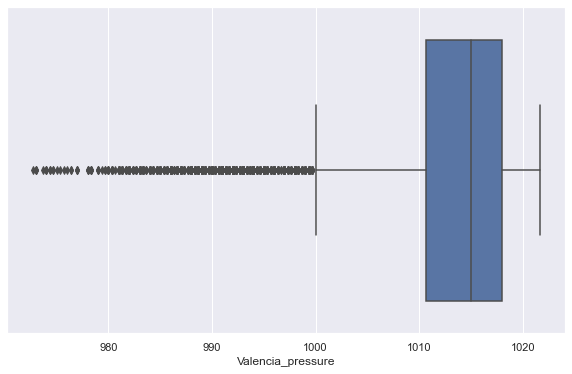

In [10]:
sns.boxplot(df_concat['Valencia_pressure'])

In [12]:
#Finding the Valencia_pressure mean

print(df_concat['Valencia_pressure'].mode())

0    1018.0
dtype: float64


In [59]:
#Filing in the NAN with mean() as it was observed above that Valencia_pressure has null values

df_clean = df_concat
df_clean['Valencia_pressure']= df_clean['Valencia_pressure'].fillna(df_clean['Valencia_pressure'].mode())

In [60]:
#Checking if the NAN were filled

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [61]:
df_clean['time']

0       2015-01-01 03:00:00
1       2015-01-01 06:00:00
2       2015-01-01 09:00:00
3       2015-01-01 12:00:00
4       2015-01-01 15:00:00
5       2015-01-01 18:00:00
6       2015-01-01 21:00:00
7       2015-01-02 00:00:00
8       2015-01-02 03:00:00
9       2015-01-02 06:00:00
10      2015-01-02 09:00:00
11      2015-01-02 12:00:00
12      2015-01-02 15:00:00
13      2015-01-02 18:00:00
14      2015-01-02 21:00:00
15      2015-01-03 00:00:00
16      2015-01-03 03:00:00
17      2015-01-03 06:00:00
18      2015-01-03 09:00:00
19      2015-01-03 12:00:00
20      2015-01-03 15:00:00
21      2015-01-03 18:00:00
22      2015-01-03 21:00:00
23      2015-01-04 00:00:00
24      2015-01-04 03:00:00
25      2015-01-04 06:00:00
26      2015-01-04 09:00:00
27      2015-01-04 12:00:00
28      2015-01-04 15:00:00
29      2015-01-04 18:00:00
30      2015-01-04 21:00:00
31      2015-01-05 00:00:00
32      2015-01-05 03:00:00
33      2015-01-05 06:00:00
34      2015-01-05 09:00:00
35      2015-01-05 1

In [62]:
#Changing 'time' date type from object to 'datetime64'
#Creating new features for time

df_clean['time'] = pd.to_datetime(df_clean['time'])
df_clean['year'] = df_clean['time'].dt.year
df_clean['month'] = df_clean['time'].dt.month
df_clean['day'] = df_clean['time'].dt.day
df_clean['hour'] = df_clean['time'].dt.hour

In [63]:
#Extracting numbers from Valencia_wind_deg
#Changing Valencia_wind_deg data type from object to numeric  

df_clean['Valencia_wind_deg'] = df_clean['Valencia_wind_deg'].str.extract('(\d+)')
df_clean['Valencia_wind_deg'] = pd.to_numeric(df_clean['Valencia_wind_deg'])

In [64]:
#Checking if the changes were applied

df_clean['Valencia_wind_deg']

0        5
1       10
2        9
3        8
4        7
5        7
6        8
7        9
8        9
9        9
10       9
11       9
12       7
13       7
14       8
15       9
16       8
17       8
18       8
19       9
20       8
21       8
22       9
23       9
24       9
25       9
26       9
27       8
28       6
29       4
30       6
31      10
32      10
33      10
34       9
35       7
36       6
37       9
38       9
39       9
40       9
41       7
42       4
43       3
44       7
45      10
46      10
47      10
48      10
49       8
50       6
51       5
52       7
53      10
54      10
55       9
56      10
57       7
58       6
59       7
60       7
61      10
62      10
63      10
64       9
65       8
66       8
67       8
68       8
69       8
70       9
71       9
72       9
73       8
74       9
75      10
76      10
77       8
78       8
79       9
80       9
81       8
82       6
83       3
84       6
85      10
86      10
87      10
88       6
89       5
90       6

In [65]:
#Extracting numbers from Seville_pressure
#Changing Seville_pressure data type from object to numeric  

df_clean['Seville_pressure'] = df_clean['Seville_pressure'].str.extract('(\d+)')
df_clean['Seville_pressure'] = pd.to_numeric(df_clean['Seville_pressure'])

In [66]:
#Checking if the changes were applied

df_clean['Seville_pressure']

0       25
1       25
2       25
3       25
4       25
5       25
6       25
7       25
8       25
9       25
10      25
11      25
12      25
13      25
14      25
15      25
16      25
17      25
18      25
19      25
20      25
21      25
22      25
23      25
24      25
25      25
26      25
27      25
28      25
29      25
30      25
31      25
32      25
33      25
34      25
35      25
36      25
37      25
38      25
39      25
40      25
41      25
42      25
43      25
44      25
45      25
46      25
47      25
48      25
49      25
50      23
51      25
52      25
53      25
54      25
55      25
56      25
57      25
58      25
59      25
60      25
61      25
62      25
63      25
64      25
65      25
66      25
67      25
68      25
69      25
70      25
71      25
72      25
73      25
74      25
75      25
76      25
77      25
78      25
79      25
80      25
81      25
82      25
83      25
84      25
85      25
86      25
87      25
88      25
89      25
90      25

In [67]:
# remove missing values/ features
# Droping 'Unnamed' column as it does not indicate what data represent
# Droping columns endswith '1hr' because majority of our data was  captured at 3hr intervals
# Droping columns that endswith 'id' because the weather conditions of a specific city at a specific time is already defined by other columns 

df_clean = df_clean.drop(['Unnamed: 0', 'time'], axis=1)
#df_clean = df_clean.drop(df_clean[df_clean.columns[df_clean.columns.str.endswith('1h')]], axis=1)
#df_clean = df_clean.drop(df_clean[df_clean.columns[df_clean.columns.str.endswith('id')]], axis=1)

In [68]:
#It can be observed from the data below that all columns have values and now have numeric data type

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 51 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int64  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

In [69]:
#Majority of the factors contains less outliers in the data 
#kurtosis is <3

df_clean.kurtosis()

Madrid_wind_speed          2.156333
Valencia_wind_deg         -1.205963
Bilbao_rain_1h            40.584429
Valencia_wind_speed       31.014311
Seville_humidity          -0.950169
Madrid_humidity           -1.151940
Bilbao_clouds_all         -1.519626
Bilbao_wind_speed          3.159652
Seville_clouds_all         1.950894
Bilbao_wind_deg           -1.064464
Barcelona_wind_speed       1.519692
Barcelona_wind_deg        -0.967252
Madrid_clouds_all         -0.076188
Seville_wind_speed         1.745508
Barcelona_rain_1h        130.956428
Seville_pressure          -1.234056
Seville_rain_1h           79.440881
Bilbao_snow_3h          1075.823322
Barcelona_pressure      4916.988101
Seville_rain_3h          552.067395
Madrid_rain_1h            63.372354
Barcelona_rain_3h        251.188884
Valencia_snow_3h        5452.830025
Madrid_weather_id          8.018543
Barcelona_weather_id       5.932283
Bilbao_pressure            1.847650
Seville_weather_id        10.402060
Valencia_pressure          4

In [70]:
#features  = ['Madrid_temp', "Bilbao_temp", 'Barcelona_temp', "Valencia_temp", "Valencia_humidity", "Madrid_pressure", "Seville_temp", "Valencia_pressure", "Bilbao_pressure", "Valencia_snow_3h", "Seville_rain_3h", "Barcelona_rain_3h", "Barcelona_pressure", "Bilbao_snow_3h", "Madrid_clouds_all", "Barcelona_wind_deg", "Bilbao_clouds_all", "Madrid_humidity", "Seville_humidity", "Valencia_wind_speed", "Madrid_wind_speed", "Valencia_wind_deg", "Bilbao_snow_3h"]
#df[features].hist(figsize=(20,20));

In [71]:
#df[features].plot(kind='density', subplots=True, layout=(5, 5), sharex=False, figsize=(20, 20));

In [72]:
#Temperature plots. show that the temperature in Spain cities is generally centered around the range of 260-310 degree
#Whereas humidity is centered around 0-100 across all cities with a humidity measure
#Rain acrros the cities in spain is centered around 0 
#Clouds_all shows a varying shape in the density plots across all cities 
#Spain cities generally do not snow , the density plots are centered around 0 for snow_3hrs
#We can conclude that the sourcees of renewable resources will most likely be affected by temperature, humidity and clouds all

<AxesSubplot:>

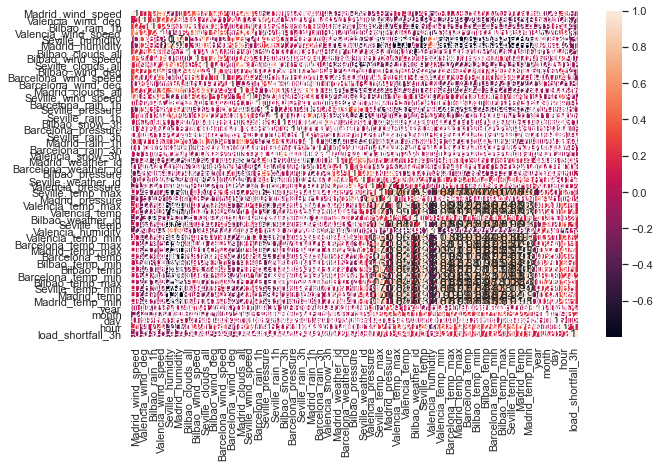

In [73]:
#Investigating correlation between our features
#Moving our dependent feature to the end of the DataFrame 

column_names = [column for column in df_clean.columns if column!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_clean=df_clean.reindex(columns=column_names)
correlation = df_clean.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)

In [74]:
# Selecting highly correlated features 
# This will remove the first feature that is correlated with any other feature

def correlation(data, threshold):
    column_correlation = set()  # Set of all the names of correlated columns
    correlation_matrix = data.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                column_name = correlation_matrix.columns[i]  # getting the name of column
                column_correlation.add(column_name)
    return column_correlation

In [75]:
#Setting our threshold to 0.8 and finding the number of features that are highly correlated

correlated_features = correlation(df_clean, 0.8)
len(set(correlated_features))

13

In [76]:
#List of highly correlated features 

column_drop = correlated_features
column_drop

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [77]:
#Droping features that are highly correlated

df_clean = df_clean.drop(column_drop,axis=1)

In [78]:
df_clean.head()

,Madrid_wind_speed,Valencia_wind_deg,Bilbao_rain_1h,Valencia_wind_speed,Seville_humidity,Madrid_humidity,Bilbao_clouds_all,Bilbao_wind_speed,Seville_clouds_all,Bilbao_wind_deg,Barcelona_wind_speed,Barcelona_wind_deg,Madrid_clouds_all,Seville_wind_speed,Barcelona_rain_1h,Seville_pressure,Seville_rain_1h,Bilbao_snow_3h,Barcelona_pressure,Seville_rain_3h,Madrid_rain_1h,Barcelona_rain_3h,Valencia_snow_3h,Madrid_weather_id,Barcelona_weather_id,Bilbao_pressure,Seville_weather_id,Valencia_pressure,Seville_temp_max,Madrid_pressure,Valencia_temp_max,Bilbao_weather_id,Valencia_humidity,year,month,day,hour,load_shortfall_3h
0,0.666667,5,0.0,0.666667,74.333333,64.000000,0.0,1.000000,0.0,223.333333,6.333333,42.666667,0.0,3.333333,0.0,25,0.0,0.0,1036.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.000000,800.0,1002.666667,274.254667,971.333333,269.888000,800.0,75.666667,2015,1,1,3,6715.666667
1,0.333333,10,0.0,1.666667,78.333333,64.666667,0.0,1.000000,0.0,221.000000,4.000000,139.000000,0.0,3.333333,0.0,25,0.0,0.0,1037.333333,0.0,0.0,0.0,0.0,800.0,800.0,1035.666667,800.0,1004.333333,274.945000,972.666667,271.728333,800.0,71.000000,2015,1,1,6,4171.666667
2,1.000000,9,0.0,1.000000,71.333333,64.333333,0.0,1.000000,0.0,214.333333,2.000000,326.000000,0.0,2.666667,0.0,25,0.0,0.0,1038.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1005.333333,278.792000,974.000000,278.008667,800.0,65.666667,2015,1,1,9,4274.666667
3,1.000000,8,0.0,1.000000,65.333333,56.333333,0.0,1.000000,0.0,199.666667,2.333333,273.000000,0.0,4.000000,0.0,25,0.0,0.0,1037.000000,0.0,0.0,0.0,0.0,800.0,800.0,1036.000000,800.0,1009.000000,285.394000,994.666667,284.899552,800.0,54.000000,2015,1,1,12,5075.666667
4,1.000000,7,0.0,1.000000,59.000000,57.000000,2.0,0.333333,0.0,185.000000,4.333333,260.000000,0.0,3.000000,0.0,25,0.0,0.0,1035.000000,0.0,0.0,0.0,0.0,800.0,800.0,1035.333333,800.0,1012.346687,285.513719,1035.333333,283.015115,800.0,58.333333,2015,1,1,15,6620.666667


In [79]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 38 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Madrid_wind_speed     11683 non-null  float64
 1   Valencia_wind_deg     11683 non-null  int64  
 2   Bilbao_rain_1h        11683 non-null  float64
 3   Valencia_wind_speed   11683 non-null  float64
 4   Seville_humidity      11683 non-null  float64
 5   Madrid_humidity       11683 non-null  float64
 6   Bilbao_clouds_all     11683 non-null  float64
 7   Bilbao_wind_speed     11683 non-null  float64
 8   Seville_clouds_all    11683 non-null  float64
 9   Bilbao_wind_deg       11683 non-null  float64
 10  Barcelona_wind_speed  11683 non-null  float64
 11  Barcelona_wind_deg    11683 non-null  float64
 12  Madrid_clouds_all     11683 non-null  float64
 13  Seville_wind_speed    11683 non-null  float64
 14  Barcelona_rain_1h     11683 non-null  float64
 15  Seville_pressure    

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section you are required to: clean the dataset, and possibly create new features - as identified in the EDA phase. |

---

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, you are required to create one or more regression models that are able to accurately predict the thee hour load shortfall. |

---

In [86]:
y = df_clean[:len(df)][['load_shortfall_3h']]

x = df_clean[:len(df)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_clean[:len(df)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df):].drop('load_shortfall_3h',axis=1)

In [87]:
# split data
regressor = RandomForestRegressor(n_estimators = 600, random_state = 0)
# Using just the training dataset to test model accuracy 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2)

In [88]:
# create targets and features dataset
regressor.fit(x_train,y_train)

preds = regressor.predict(x_test)

In [89]:
# create one or more ML models
def rmse(y_test, y_predict):
    return np.sqrt(mean_squared_error(y_test, y_predict))

In [90]:
# evaluate one or more ML models
rmse(y_test, preds)

3026.607040184124

In [91]:
from sklearn.metrics import r2_score
r2_score(y_test, preds)

0.6667564363403058

In [42]:
x_train = df_clean[:len(df)].drop('load_shortfall_3h',axis=1)
x_test = df_clean[len(df):].drop('load_shortfall_3h',axis=1)

In [43]:
regressor.fit(x_train,y)

preds = regressor.predict(x_test)

In [44]:
daf=pd.DataFrame(preds, columns=['load_shortfall_3h'])
daf.head()

,load_shortfall_3h
0,9720.880000
1,7958.596667
2,6830.160000
3,9190.500000
4,11801.078333


In [45]:
output = pd.DataFrame({"time":df1['time']})
submission = output.join(daf)        
submission.to_csv("submission.csv", index=False)

In [46]:
submission

,time,load_shortfall_3h
0,2018-01-01 00:00:00,9720.880000
1,2018-01-01 03:00:00,7958.596667
2,2018-01-01 06:00:00,6830.160000
3,2018-01-01 09:00:00,9190.500000
4,2018-01-01 12:00:00,11801.078333
5,2018-01-01 15:00:00,11558.785000
6,2018-01-01 18:00:00,11754.168333
7,2018-01-01 21:00:00,11555.360000
8,2018-01-02 00:00:00,8408.676667
9,2018-01-02 03:00:00,5422.693333


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model performance ⚡ |
| :--------------------------- |
| In this section you are required to compare the relative performance of the various trained ML models on a holdout dataset and comment on what model is the best and why. |

---

In [ ]:
# Compare model performance

In [ ]:
# Choose best model and motivate why it is the best choice

<a id="seven"></a>
## 7. Model Explanations
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Model explanation ⚡ |
| :--------------------------- |
| In this section, you are required to discuss how the best performing model works in a simple way so that both technical and non-technical stakeholders can grasp the intuition behind the model's inner workings. |

---

In [ ]:
# discuss chosen methods logic